# **Natural Language Project: Emotion Classification from Text Dataset**
By Haris Yafie

Email: yafie345@gmail.com

# Library

Import necessary library here

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import spacy
import re
import string
import unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Data Wrangling
Before we go into modelling, we need to clean and preprocess our text dataset.

## Data Collection

Download dataset from my personal google drive
(Dataset source is from [Kaggle](https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/data)). I merged the dataset for this project.

In [ ]:
!gdown 14uCoKNllWqURnthzi-3s5q5VpPTd_AFu

Downloading...
From: https://drive.google.com/uc?id=14uCoKNllWqURnthzi-3s5q5VpPTd_AFu
To: /content/emotion.csv
100% 2.09M/2.09M [00:00<00:00, 20.0MB/s]


## Read The Dataset

In [ ]:
df = pd.read_csv('/content/emotion.csv')

In [ ]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


## Basic information about the dataset

In [ ]:
print("Basic Information about the Dataset:")
print(df.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     20000 non-null  object
 1   Emotion  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB
None


Total data in our dataset is 20,000

Check the null values in dataset, and apparently there is no null value which is good.

In [ ]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

## Text Preprocessing
In text dataset, we need to do text preprocessing to clean and transform raw text into a format that is suitable for analysis and model training.

### Text Lowering
Lower any capital letters in 'Text' column and create a new 'Text_clean' column to be used in modelling

In [ ]:
df['Text_clean'] = df['Text'].str.lower()
df.head()

,Text,Emotion,Text_clean
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy


### Convert Emoticons
Convert emoticons into word that represent emotion by using the function below.

In [ ]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [ ]:
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', " ".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

Apply the function to the 'Text_clean' column

In [ ]:
df['Text_clean'] = df['Text_clean'].astype(str).apply(convert_emoticons)
df.head()

,Text,Emotion,Text_clean
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy


### Remove Punctuation
Remove any punctuation by using the function below.

In [ ]:
remove_punct = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', remove_punct))

Apply the remove_punctuation function to the 'Text_clean' column

In [ ]:
df['Text_clean'] = df['Text_clean'].apply(lambda text: remove_punctuation(text))
df.head()

,Text,Emotion,Text_clean
0,i didnt feel humiliated,sadness,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,anger,i am feeling grouchy


### Remove Stopwords
Remove any stopwords by using the function below.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopword = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


Apply the remove_stopwords function to the 'Text_clean' column



In [ ]:
df['Text_clean'] = df['Text_clean'].apply(lambda text: remove_stopwords(text))
df.head()

,Text,Emotion,Text_clean
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,feeling nostalgic fireplace will know still pr...
4,i am feeling grouchy,anger,feeling grouchy


### Lemmatize Words
Lemmatization is the process of reducing words to their base or root form, typically by removing inflections or variations. Lemmatize words by using the function below. Lemmatization is better than stemming word because Stemming is a rule-based approach, whereas lemmatization is a canonical dictionary-based approach. For example, for word 'happier' when using stemming it will become 'happi' while using lemmatization it will be 'happy'

In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])


Apply the lemmatize_words function to the 'Text_clean' column

In [ ]:
df["Text_clean"] = df["Text_clean"].apply(lambda text: lemmatize_words(text))
df.head()

,Text,Emotion,Text_clean
0,i didnt feel humiliated,sadness,didnt feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damn hopeful around someon...
2,im grabbing a minute to post i feel greedy wrong,anger,im grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,feel nostalgic fireplace will know still property
4,i am feeling grouchy,anger,feel grouchy


We will do the tokenizing and create sequences later when we are going to split the dataset and preparing to create the model

# Exploratory Data Analysis
To gain information about the dataset. We are going to create histogram, bar plot, and wordcloud.

## Histogram of Text Length
With histogram, we could get information about the distribution of text length. We also make statistics descriptive about our text.


Descriptive Statistics for Text Length:
count    20000.00000
mean        57.04590
std         32.80608
min          4.00000
25%         32.00000
50%         50.00000
75%         75.00000
max        221.00000
Name: Text_length, dtype: float64


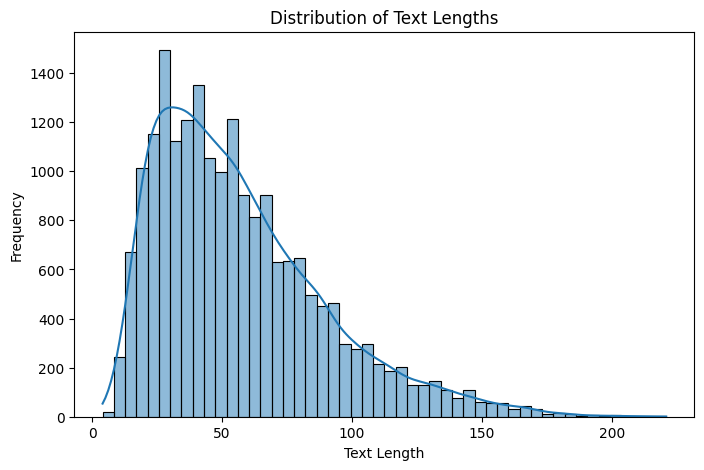

In [ ]:
# Descriptive statistics for text length
df['Text_length'] = df['Text_clean'].apply(len)
print("\nDescriptive Statistics for Text Length:")
print(df['Text_length'].describe())

# Distribution of text lengths
plt.figure(figsize=(8, 5))
sns.histplot(df['Text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

As you can see, based on the statistics descriptive, the maximum of text length is 221 words while the minimum is 4. With 57 words averaging in the dataset. Based on the histogram, the distribution of text length in the dataset is right skewed.

## Wordcloud
Wordcloud is a visualization that showing the most frequent words. We create wordcloud based on the every emotion classes.

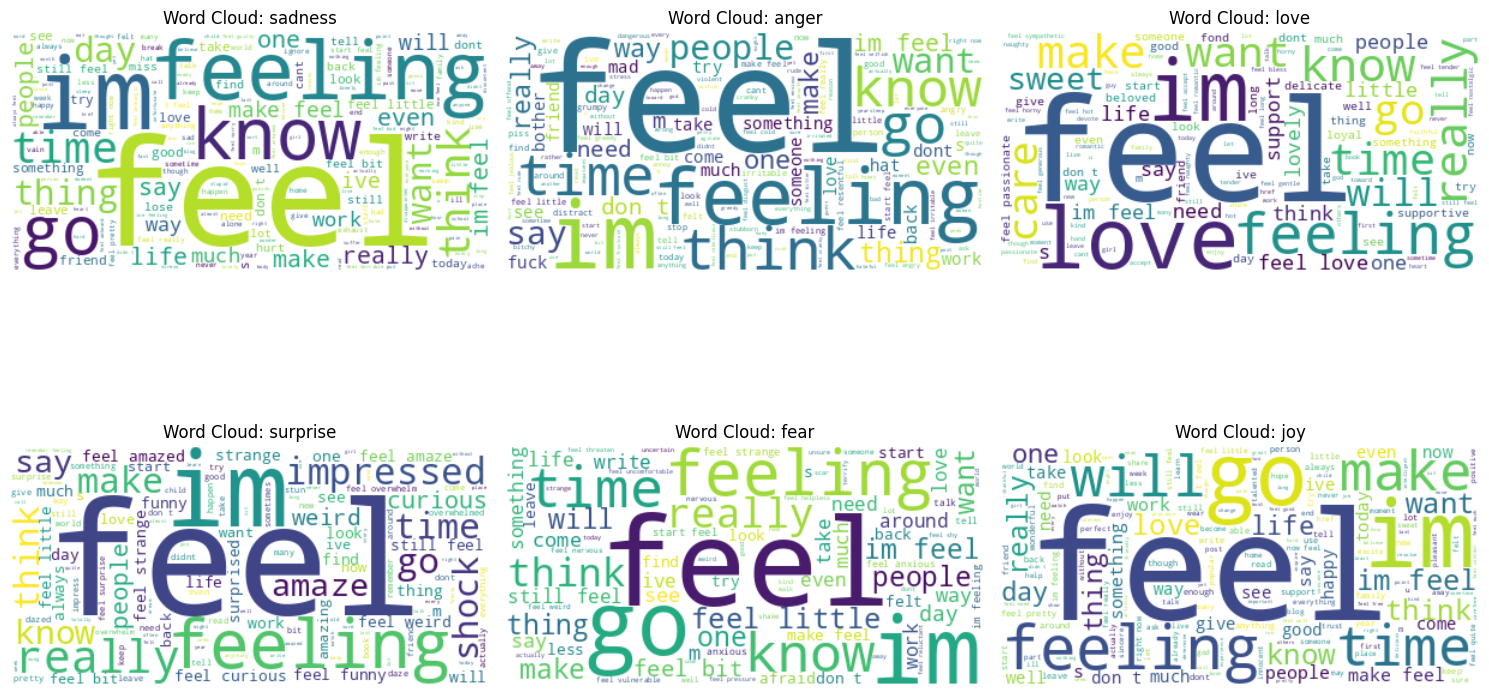

In [ ]:
# Assuming you have a column 'Emotion' in your DataFrame
emotion_classes = df['Emotion'].unique()

# Set up subplots based on the number of emotion classes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for idx, emotion in enumerate(emotion_classes):
    # Select subset of data for the current emotion
    subset_text = ' '.join(df[df['Emotion'] == emotion]['Text_clean'])

    # Create a word cloud for the current emotion
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(subset_text)

    # Plot the word cloud in the corresponding subplot
    ax = axes[idx // 3, idx % 3]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud: {emotion}')
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Based on the wordcloud, in every classes, the word 'feel' is the most frequent

## Bar Plot of Emotions Count

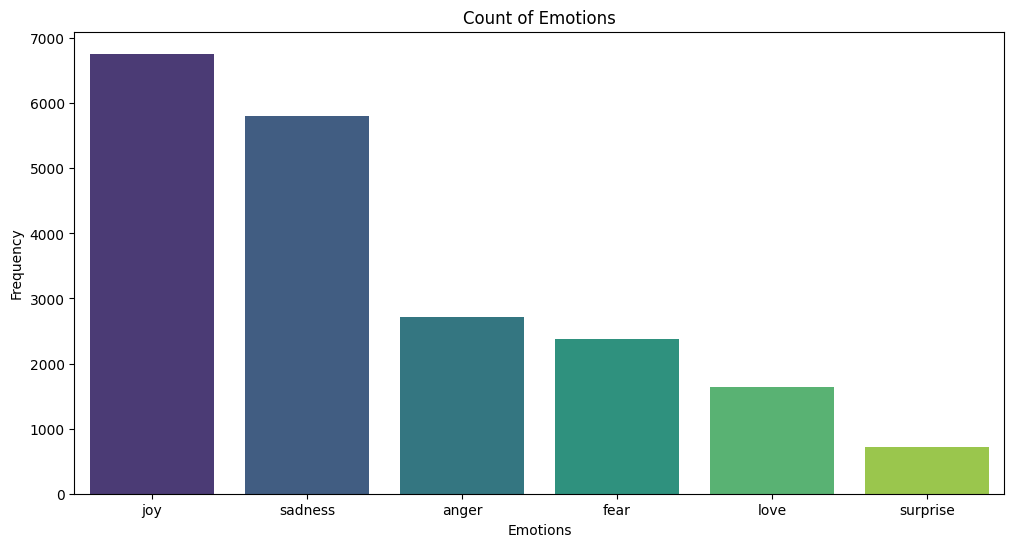

In [ ]:
# Plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Emotion'].value_counts().index, y=df['Emotion'].value_counts(), palette='viridis')
plt.title('Count of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.show()

Based on the bar plot, we can see that 'joy' emotion has highest frequency while 'surprise' emotion has the lowest frequency.

# Modelling
After we preprocess our text dataset, next up modelling our machine learning model. But before that, we need to prepare the dataset by tokenizing, create sequence, and splitting dataset.

## Data Preparation

Extract the values of 'Text_clean' column as sentences and 'Emotion' column as label

In [ ]:
sentences = df['Text_clean'].values
label = df['Emotion'].values

In [ ]:
sentences

array(['didnt feel humiliate',
       'go feeling hopeless damn hopeful around someone care awake',
       'im grab minute post feel greedy wrong', ...,
       'feel important share info experience thing',
       'truly feel passionate enough something stay true will succeed',
       'feel wanna buy cute make see online even one'], dtype=object)

In [ ]:
label

array(['sadness', 'sadness', 'anger', ..., 'joy', 'joy', 'joy'],
      dtype=object)

Split the dataset into training and testing sets with ratio of 80:20 where 80% of training sets and 20% testing sets

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sentences, label, test_size=0.2, random_state=42)

Find the max length of text to be used in pad_sequences

In [ ]:
max([len(t) for t in df['Text_clean']])

221

Here we are going to tokenize and create padded sequences of our text training and testing sets.

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='UNK')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

padded_train = pad_sequences(sequences_train, maxlen=221, truncating='post')
padded_test = pad_sequences(sequences_test, maxlen=221, truncating='post')

We encode our labels with LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Then, because our classification is multiclass, we need to convert class vector into multiclass matrix.

In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert the class vector (integers) to multiclass matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Here is the example of our multiclass matrix in label training sets

In [ ]:
y_train

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

To calculate vocab_size where it will be used for input_dim in our model

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
vocab_size

13924

## Model Building
Below we build the NLP classification model. We are going to use embedding layer for the input, 3 layers of LSTM, 1 dropout layer, 2 dense layer, and last is the output dense layer

In [ ]:
# Build the NLP neural network
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=200, input_length=221),
    tf.keras.layers.LSTM(256, return_sequences=True),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Summary of our model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 221, 200)          2784800   
                                                                 
 lstm (LSTM)                 (None, 221, 256)          467968    
                                                                 
 lstm_1 (LSTM)               (None, 221, 128)          197120    
                                                                 
 dropout (Dropout)           (None, 221, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8

Callback function for early stopping when we train the model. We set the desired validation accuracy over 91%.

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('val_accuracy') > 0.91):
      print("\nReached 91% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

Let's start train our model!

In [ ]:
# Train the model
history = model.fit(padded_train,
                    y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(padded_test, y_test),
                    callbacks=callbacks)

Epoch 1/10
500/500 [==============================] - 42s 69ms/step - loss: 1.5744 - accuracy: 0.3329 - val_loss: 1.4377 - val_accuracy: 0.3770
Epoch 2/10
500/500 [==============================] - 17s 34ms/step - loss: 1.1052 - accuracy: 0.4715 - val_loss: 0.6781 - val_accuracy: 0.7258
Epoch 3/10
500/500 [==============================] - 19s 39ms/step - loss: 0.4717 - accuracy: 0.8159 - val_loss: 0.3889 - val_accuracy: 0.8810
Epoch 4/10
500/500 [==============================] - 18s 36ms/step - loss: 0.2405 - accuracy: 0.9226 - val_loss: 0.2599 - val_accuracy: 0.9038
Epoch 5/10
500/500 [==============================] - 17s 34ms/step - loss: 0.1639 - accuracy: 0.9436 - val_loss: 0.2979 - val_accuracy: 0.9075
Epoch 6/10
500/500 [==============================] - ETA: 0s - loss: 0.1295 - accuracy: 0.9532
Reached 91% accuracy so cancelling training!
500/500 [==============================] - 18s 35ms/step - loss: 0.1295 - accuracy: 0.9532 - val_loss: 0.2690 - val_accuracy: 0.9140


Wow, with 6 epoch we have achieved our desired validation accuracy which is over 91% (~91.4%) and training accuracy of 95%.

## Model Evaluation
Model evaluation from the results of the training process is shown by creating accuracy plots and loss plots for training and validation.

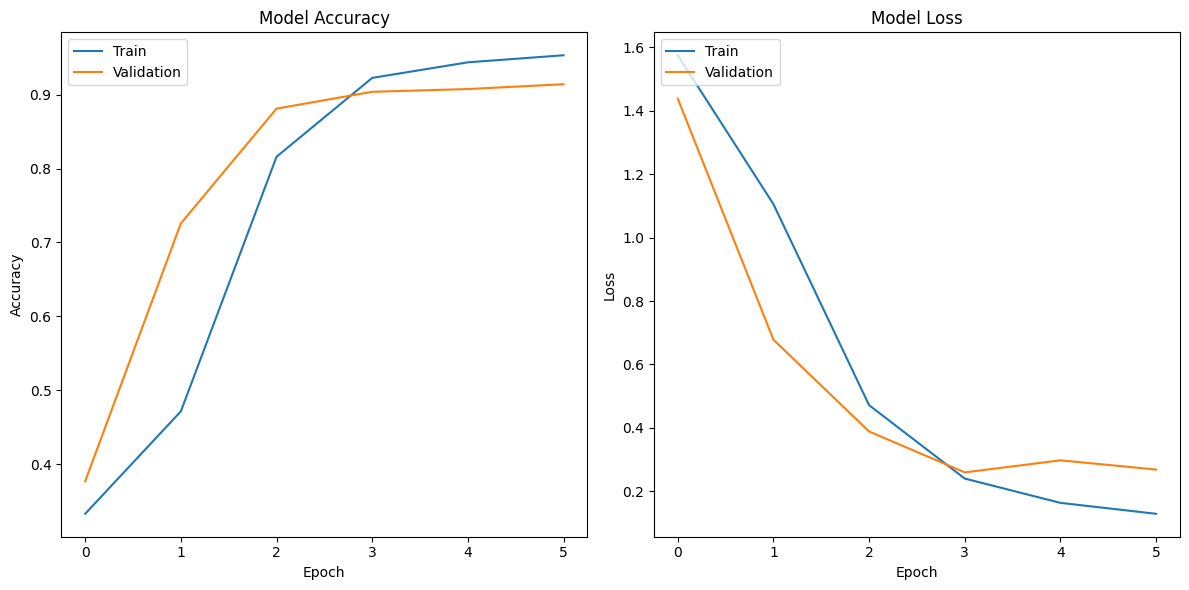

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Accuracy on the first subplot
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot Loss on the second subplot
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()

plt.show()

# Model Test

After we build and train our model, we should test our model with unseen data by using this function below. To test the model we can create a new text input. The first function is to preprocess the text that we inputted. Then we predict the processed inputted text with our model to determine its emotion.

In [ ]:
def preprocess_text(text):
    # Implement text preprocessing steps here
    processed_text = text.lower() # lower text
    processed_text = convert_emoticons(text)  # convert emoticons to word
    processed_text = remove_punctuation(text) # remove any punctuation
    processed_text = remove_stopwords(text) # remove any stopwords
    processed_text = lemmatize_words(text)  # lemmatize words
    processed_text = tokenizer.texts_to_sequences([processed_text]) # tokenize the text
    processed_text = pad_sequences(processed_text, maxlen=221, truncating='post') # pad sequences to the texet
    return processed_text


In [ ]:
# Input text to predict with the model
input_text= "I feel sad"

# Preprocessed the inputted text
processed_text = preprocess_text(input_text)

# Predict the inputted text
result = le.inverse_transform(np.argmax(model.predict(processed_text), axis=-1))[0] # to give class result
probability_value =  np.max(model.predict(processed_text)) # to print probability value

# Print the result
print(f'Inputted Text: {input_text}')
print(f'Predicted Class: {result} | Probability: {probability_value:.4f}')



1/1 [==============================] - 0s 29ms/step
Inputted Text: I feel sad
Predicted Class: sadness | Probability: 0.9995


The model predicts our inputted text ('I feel sad') is belong to 'sadness' emotion

Below is a visualization of probability values to provide another information of probability values that might be in other classes

1/1 [==============================] - 0s 28ms/step


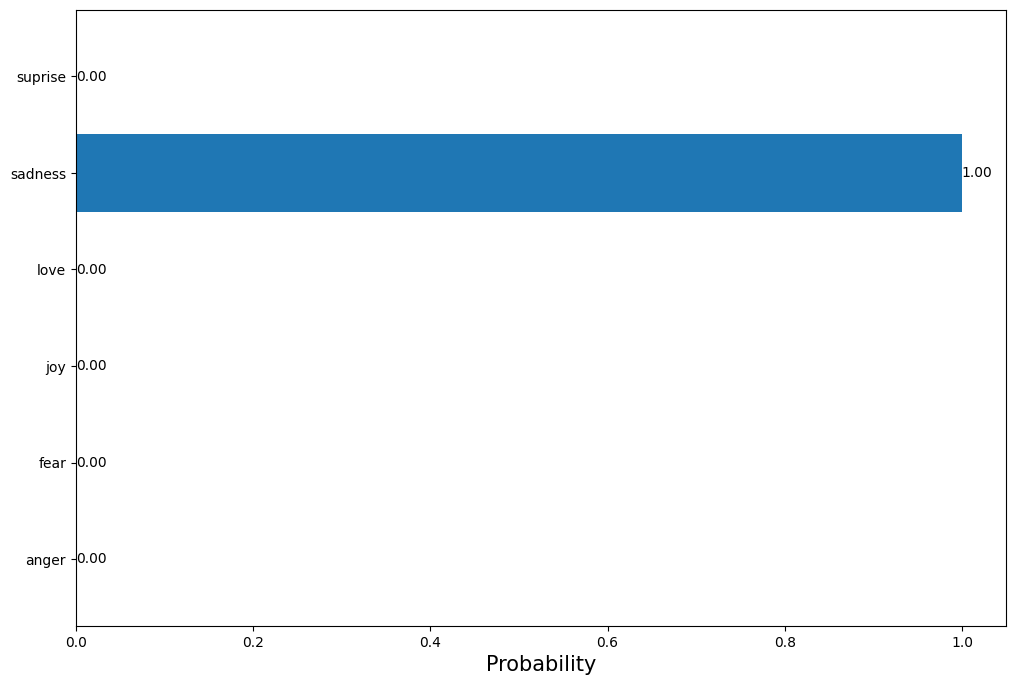

In [ ]:
emotions = {0: 'anger', 1: 'fear', 2: 'joy', 3:'love', 4:'sadness', 5:'suprise'}

labs = list(emotions.values())
probs = list(model.predict(processed_text)[0])

fig, ax = plt.subplots(figsize=(12,8))
bars = ax.barh(labs, probs)
ax.set_xlabel('Probability', fontsize=15)
ax.bar_label(bars, fmt = '%.2f')
plt.show()